# The Partitura Package

partitura is python 3 package for symbolic music processing developed and maintained at OFAI Vienna / CP JKU Linz (and otther contributors). It's inteded to give a lightweight musical part representation that makes many score properties easily accessible for specific tasks. Furthermore it's a very useful I/O utility to parse computer formats of symbolic music such as MusicXML / MIDI. 

The repo can be found here (stable = master branch, bleeding edge = develop): https://github.com/CPJKU/partitura
Documentation can be found here: https://partitura.readthedocs.io/en/latest/

# The part object

The ```part``` object is the central object of partitura. It contains a score.
- it is a timeline object
- time is measured in divs
- its elements are timed objects, i.e. they have a starting time and an ending time
- external score files are loaded into a part
- parts can be exported into score files
- it contains many useful methods related to its properties


In [1]:
import partitura as pt
path_to_musicxml = pt.EXAMPLE_MUSICXML
score = pt.load_musicxml(path_to_musicxml)
part = score[0]
print(part.pretty())
# what do we need to modify to see a somewhat pretty part?
# what do we see here?

Part id="P1" name="Piano"
 │
 ├─ TimePoint t=0 quarter=12
 │   │
 │   └─ starting objects
 │       │
 │       ├─ 0--48 Measure number=1
 │       ├─ 0--48 Note id=n01 voice=1 staff=2 type=whole pitch=A4
 │       ├─ 0--48 Page number=1
 │       ├─ 0--24 Rest id=r01 voice=2 staff=1 type=half
 │       ├─ 0--48 System number=1
 │       └─ 0-- TimeSignature 4/4
 │
 ├─ TimePoint t=24 quarter=12
 │   │
 │   ├─ ending objects
 │   │   │
 │   │   └─ 0--24 Rest id=r01 voice=2 staff=1 type=half
 │   │
 │   └─ starting objects
 │       │
 │       ├─ 24--48 Note id=n02 voice=2 staff=1 type=half pitch=C5
 │       └─ 24--48 Note id=n03 voice=2 staff=1 type=half pitch=E5
 │
 └─ TimePoint t=48 quarter=12
     │
     └─ ending objects
         │
         ├─ 0--48 Measure number=1
         ├─ 0--48 Note id=n01 voice=1 staff=2 type=whole pitch=A4
         ├─ 24--48 Note id=n02 voice=2 staff=1 type=half pitch=C5
         ├─ 24--48 Note id=n03 voice=2 staff=1 type=half pitch=E5
         ├─ 0--48 Page number=

## Notes

In [2]:
part.notes

In [3]:
# notes are timed objects
part.notes[0].start
# dir(part.notes[0])

In [4]:
# adding notes (times in divs!)
a_new_note = pt.score.Note(id='n04', step='A', octave=4, voice=1)
part.add(a_new_note, start=0, end=12)
# print(part.pretty())

In [5]:
# deleting notes
part.remove(a_new_note)
# print(part.pretty())

# how do you go about notes for which you don't have the corresponding object variable?

## Iterating over arbitrary musical objects

In [6]:
for measure in part.iter_all(pt.score.Measure):
    print(measure)

0--48 Measure number=1


In [7]:
for note in part.iter_all(pt.score.Note, include_subclasses=True, start=0, end=24):
    print(note)

0--48 Note id=n01 voice=1 staff=2 type=whole pitch=A4


## The note_array

In [8]:
# getting structured numpy array of notes from a part 
part.note_array()

array([(0., 4., 0., 4.,  0, 48, 69, 1, 'n01'),
       (2., 2., 2., 2., 24, 24, 72, 2, 'n02'),
       (2., 2., 2., 2., 24, 24, 76, 2, 'n03')],
      dtype=[('onset_beat', '<f4'), ('duration_beat', '<f4'), ('onset_quarter', '<f4'), ('duration_quarter', '<f4'), ('onset_div', '<i4'), ('duration_div', '<i4'), ('pitch', '<i4'), ('voice', '<i4'), ('id', '<U256')])

In [9]:
part.note_array()[["onset_beat", "pitch"]]

array([(0., 69), (2., 72), (2., 76)],
      dtype={'names':['onset_beat','pitch'], 'formats':['<f4','<i4'], 'offsets':[0,24], 'itemsize':1056})

## File Import

In [10]:
# score representation format musicXML -> lets look at a file
score = pt.load_musicxml(path_to_musicxml)

In [11]:
path_to_midifile = pt.EXAMPLE_MIDI
performance = pt.load_performance_midi(path_to_midifile)

### excursion: what's a performed part?

In [12]:
performance[0].notes

[{'midi_pitch': 69,
  'note_on': 0.0,
  'note_off': 2.0,
  'track': 0,
  'channel': 1,
  'velocity': 64,
  'id': 'n0',
  'sound_off': 2.0},
 {'midi_pitch': 72,
  'note_on': 1.0,
  'note_off': 2.0,
  'track': 0,
  'channel': 2,
  'velocity': 64,
  'id': 'n1',
  'sound_off': 2.0},
 {'midi_pitch': 76,
  'note_on': 1.0,
  'note_off': 2.0,
  'track': 0,
  'channel': 2,
  'velocity': 64,
  'id': 'n2',
  'sound_off': 2.0}]

### excursion of the excursion: why isn't this a score representation?
musical notes representation format MIDI -> lets look at a file

In [13]:
with open("example_data\\Chopin_op10_no3_p01.mid", 'rb') as f:
    # print(dir(f))
    for line in f:        
        print((line.hex()))
        print("---")

4d54686400000006000100040fa04d54726b0000000b00ff510307a12000ff2f004d54726b0000107682b804903b2c9118803b409b189028160a
---
904036844490381aa902902f146e903b2582048038409a7a8040408374903f3400802f4082409038208356803b408f5a803840894e90403b8152903b298102902f1a3c803f4081348028409e2890423a817a803b401e903f290090231e32802f40789039208134804040a47a902f1f5a8039408102903b249d3a802f4028903928844e803b40924c802340853c902f1e1e903b2c0a
---
8039409d129039271490231e46802f408458803b408b348042408c7c80394081029044391e903b2c8116902f1f850a
---
803f408550803b4083608044408740802f40856490443f8120903f30835690390b910480394081208044408564904241817a903b2d32902f1f836a803b405a803f40857880234032804240844e802f40934e90443d813490281d3290403050903821a6388038403c902f1b0a
---
903b269a7a802f40832e9038248254803b40957080384081708028401e902f1932903b2b9c5690281b32802f404690382950803b4082048040408b0c804440836a8038408a6e904539812a902f21812090402a885680404083248045408408802f408a00904544831a903b2c9140803b40877c904448822290402d0a
---
902

### part + performedpart + note alignment = match file

In [14]:
performance_m, alignment, score_m = pt.load_match("example_data\\Chopin_op10_no3_p01.match", create_part=True)

In [15]:
alignment

[{'label': 'match', 'score_id': 'n1', 'performance_id': 0},
 {'label': 'match', 'score_id': 'n2', 'performance_id': 2},
 {'label': 'match', 'score_id': 'n3', 'performance_id': 3},
 {'label': 'match', 'score_id': 'n4', 'performance_id': 1},
 {'label': 'match', 'score_id': 'n5', 'performance_id': 5},
 {'label': 'match', 'score_id': 'n6', 'performance_id': 4},
 {'label': 'match', 'score_id': 'n7', 'performance_id': 6},
 {'label': 'match', 'score_id': 'n8', 'performance_id': 7},
 {'label': 'match', 'score_id': 'n9', 'performance_id': 8},
 {'label': 'match', 'score_id': 'n10', 'performance_id': 9},
 {'label': 'match', 'score_id': 'n11', 'performance_id': 10},
 {'label': 'match', 'score_id': 'n12', 'performance_id': 11},
 {'label': 'match', 'score_id': 'n13', 'performance_id': 13},
 {'label': 'match', 'score_id': 'n14', 'performance_id': 14},
 {'label': 'match', 'score_id': 'n15', 'performance_id': 12},
 {'label': 'match', 'score_id': 'n16', 'performance_id': 16},
 {'label': 'match', 'score_

## File export

In [16]:
pt.save_musicxml(part, "musicxml_out.xml")

In [17]:
pt.save_performance_midi(performance[0], "midi_out.mid")

In [18]:
pt.save_match(alignment, performance_m[0], score_m[0],  "match_out.match")

### Some more imports for further processing

In [31]:
from partitura.musicanalysis.performance_codec import (encode_performance,
                                                        get_unique_onset_idxs,
                                                        notewise_to_onsetwise)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A slightly more involved usage example

In [32]:
def match2tempo(match_path):
    """
    computes tempo curve from a match file.

    Parameters
    ----------
    match_path : string
        a path of a match file
    
    Returns
    -------
    tempo_curve_and_onsets : numpy array
        score onsets and corresponding tempo curve stacked as columns
    """

    perf, alignment, scor = pt.load_match(match_path, create_part=True)
    ppart, part = perf[0], scor[0]
    ppart.sustain_pedal_threshold = 128
    
    targets, snote_ids, ux = encode_performance(part, ppart, alignment, return_u_onset_idx=True)  
  
    nid_dict = dict((n.id, i) for i, n in enumerate(part.notes_tied))
    matched_subset_idxs = np.array([nid_dict[nid] for nid in snote_ids])       

    score_onsets = part.note_array()[matched_subset_idxs]['onset_beat'] # changed from onset_beat
    unique_onset_idxs, uni = get_unique_onset_idxs(score_onsets, return_unique_onsets=True)

    tmp_crv = notewise_to_onsetwise(np.array([targets["beat_period"]]).T, unique_onset_idxs)  
    tempo_curve_and_onsets = np.column_stack((uni, tmp_crv))

    return tempo_curve_and_onsets

In [33]:
te = match2tempo("match_out.match")

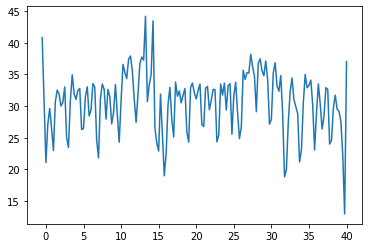

In [35]:
plt.plot(te[:,0], 60/te[:,1])